## E-COMMERCE data analysis 

## data prepartion and cleaning 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
pip install pyxlsb


Note: you may need to restart the kernel to use updated packages.


## converting excel binary file to excel 

In [4]:
from pyxlsb import open_workbook
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd


input_file = 'ecommerce sales.xlsb'
output_file = 'output_file.xlsx'

data = []

with open_workbook(input_file) as wb:
    with wb.get_sheet(1) as sheet:  
        for row in sheet.rows():
            data.append([item.v for item in row])


df = pd.DataFrame(data)

wb = Workbook()
ws = wb.active

for row in dataframe_to_rows(df, index=False, header=True):
    ws.append(row)

wb.save(output_file)

print(f'Conversion complete. Data saved to {output_file}')


Conversion complete. Data saved to output_file.xlsx


In [5]:
data=pd.read_excel('output_file.xlsx')

In [6]:
data

,0,1,2,3,4,5,6,7,8,9
0,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
1,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10
2,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10
3,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10
4,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10
...,...,...,...,...,...,...,...,...,...,...
525030,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,44284,530,1,70.83,25
525031,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,44284,15,1,0,3
525032,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,44284,23,1,0,6
525033,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,44284,15,2,0,7


In [7]:
data.isnull().sum()

0         0
1         0
2         0
3     17687
4     11745
5         0
6         0
7         0
8         0
9    239423
dtype: int64

In [8]:
data.columns.to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
data[1]

0                                           Libellé produit
1              Table basse carrée detroit design industriel
2                         Ours en peluche géant 150 cm brun
3                        Ours en peluche géant 100 cm blanc
4           Lot de 4 chaises mia noires pour salle à manger
                                ...                        
525030    Lit coffre madrid 140x200 + 1 sommier ch ne bl...
525031    Nappe antitache ronde infroissable et 100 poly...
525032    Good morning housse de couette pour enfants da...
525033                    Ampoule pour four e14 25w 230v ac
525034          At4 chambre complète carnaval blanc bouleau
Name: 1, Length: 525035, dtype: object

In [10]:
data.duplicated

<bound method DataFrame.duplicated of                 0                                                  1  \
0         Cod_cmd                                    Libellé produit   
1       182210782       Table basse carrée detroit design industriel   
2       182082437                  Ours en peluche géant 150 cm brun   
3       182095765                 Ours en peluche géant 100 cm blanc   
4       182615392    Lot de 4 chaises mia noires pour salle à manger   
...           ...                                                ...   
525030  186997203  Lit coffre madrid 140x200 + 1 sommier ch ne bl...   
525031  187045930  Nappe antitache ronde infroissable et 100 poly...   
525032  187019687  Good morning housse de couette pour enfants da...   
525033  186990574                  Ampoule pour four e14 25w 230v ac   
525034  211053330        At4 chambre complète carnaval blanc bouleau   

                    2                    3                  4  \
0             Vendeur           

In [11]:
data = data.apply(lambda x: x.fillna(np.random.rand() * 10))  ## replacing missing values with random

In [12]:
data

,0,1,2,3,4,5,6,7,8,9
0,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
1,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10
2,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10
3,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10
4,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10
...,...,...,...,...,...,...,...,...,...,...
525030,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,44284,530,1,70.83,25
525031,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,44284,15,1,0,3
525032,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,44284,23,1,0,6
525033,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,44284,15,2,0,7


In [13]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [14]:
data_no_duplicates = data.drop_duplicates()


In [15]:
data.duplicated() ## removing duplicates 

0         False
1         False
2         False
3         False
4         False
          ...  
525030    False
525031    False
525032    False
525033    False
525034    False
Length: 525035, dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525035 entries, 0 to 525034
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       525035 non-null  object
 1   1       525035 non-null  object
 2   2       525035 non-null  object
 3   3       525035 non-null  object
 4   4       525035 non-null  object
 5   5       525035 non-null  object
 6   6       525035 non-null  object
 7   7       525035 non-null  object
 8   8       525035 non-null  object
 9   9       525035 non-null  object
dtypes: object(10)
memory usage: 40.1+ MB


In [17]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,525035,525035,525035,525035,525035,525035,525035,525035,525035,525035.000000
unique,404940,56019,8,12,598,91,2152,42,545,76.000000
top,181478638,Adhérer au programme fidélité Ma Carte Confo +,Vendeur 1,Chambre Literie,Matelas,44216,15,1,0,8.518503
freq,31,6916,291545,122025,35593,12671,62311,486202,399117,239423.000000


In [18]:
data.shape

(525035, 10)

In [19]:
import pandas as pd
column_names = data.columns
print(column_names)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [20]:
print(data.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [21]:
column_names = data.columns
print(column_names)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


## overview data 

In [22]:
data

,0,1,2,3,4,5,6,7,8,9
0,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
1,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10
2,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10
3,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10
4,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10
...,...,...,...,...,...,...,...,...,...,...
525030,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,44284,530,1,70.83,25
525031,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,44284,15,1,0,3
525032,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,44284,23,1,0,6
525033,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,44284,15,2,0,7


In [23]:
column_0=data.iloc[:, 0] 
column_1 = data.iloc[:, 1] 
column_0
column_1

0                                           Libellé produit
1              Table basse carrée detroit design industriel
2                         Ours en peluche géant 150 cm brun
3                        Ours en peluche géant 100 cm blanc
4           Lot de 4 chaises mia noires pour salle à manger
                                ...                        
525030    Lit coffre madrid 140x200 + 1 sommier ch ne bl...
525031    Nappe antitache ronde infroissable et 100 poly...
525032    Good morning housse de couette pour enfants da...
525033                    Ampoule pour four e14 25w 230v ac
525034          At4 chambre complète carnaval blanc bouleau
Name: 1, Length: 525035, dtype: object

In [24]:
list(data.columns.values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:

nature_sales = data[4].value_counts().reset_index()
nature_sales.columns = [4, 'Count']
print("\nSales by Nature:")
print(nature_sales)




Sales by Nature:
                       4  Count
0                Matelas  35593
1             Lit adulte  21133
2    Meuble à chaussures  19105
3                 Chaise  15591
4                 Bureau  15409
..                   ...    ...
593   Décapeur thermique      1
594    Fendeur de bûches      1
595   Accessoire biberon      1
596     Lame de terrasse      1
597               Nature      1

[598 rows x 2 columns]


In [26]:
data[6] = pd.to_numeric(data[6], errors='coerce')


In [27]:
data[6]

0           NaN
1         244.0
2          28.0
3          15.0
4         385.0
          ...  
525030    530.0
525031     15.0
525032     23.0
525033     15.0
525034    669.0
Name: 6, Length: 525035, dtype: float64

In [28]:
data.corr()

,6
6,1.0


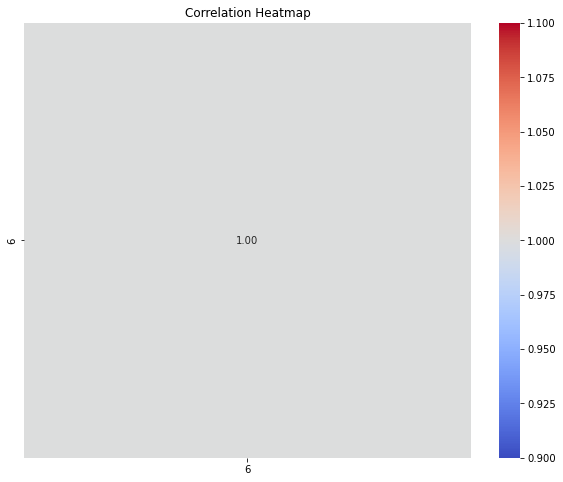

In [29]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



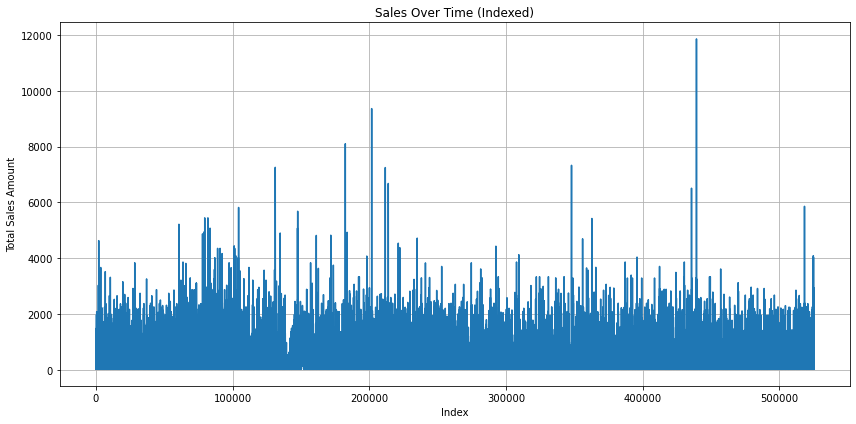

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data[6])
plt.xlabel('Index')
plt.ylabel('Total Sales Amount')
plt.title('Sales Over Time (Indexed)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd


# Find the row with the maximum sales amount based on index
max_sales_row = data.iloc[data[6].idxmax()

vendor_with_max_sales = max_sales_row[3]

print(f"Vendor with Maximum Sales: {vendor_with_max_sales}")

Vendor with Maximum Sales: TV Son Multimédia


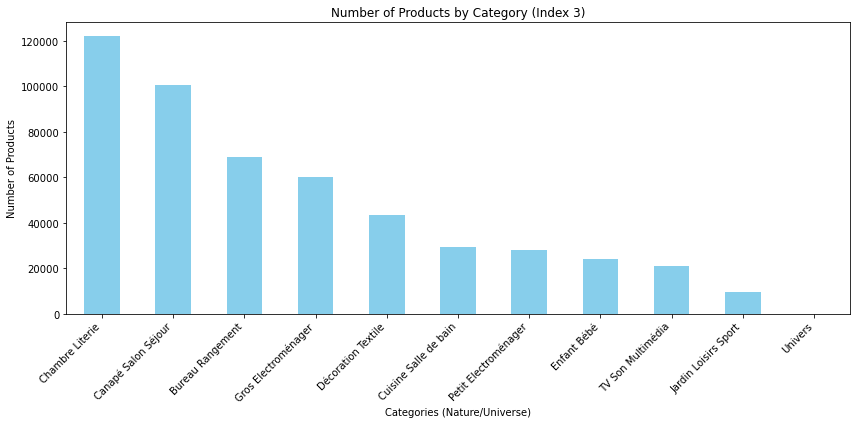

In [37]:
index_column_3 = df.iloc[:, 3]

# Count the number of products in each category (unique values in the selected column)
column_counts = index_column_3.value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
column_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories (Nature/Universe)')
plt.ylabel('Number of Products')
plt.title('Number of Products by Category (Index 3)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [45]:
df.set_index(df.columns[3], inplace=True)
nature_counts = df.index.value_counts()


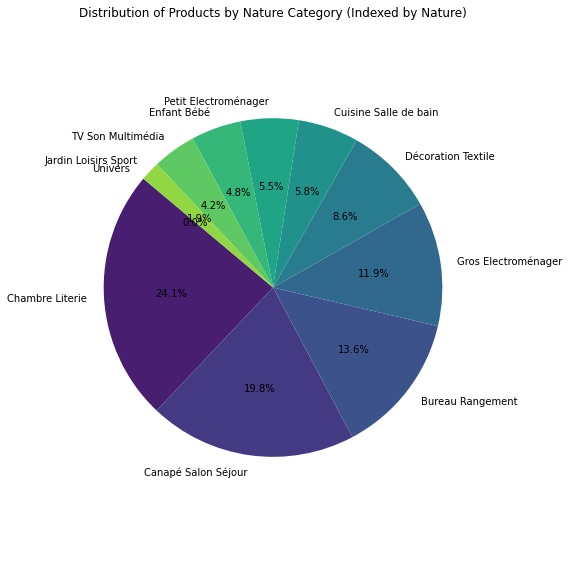

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(nature_counts.values, labels=nature_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(nature_counts)))
plt.axis('equal')
plt.title('Distribution of Products by Nature Category (Indexed by Nature)')
plt.tight_layout()
plt.show()

In [75]:
transport_prices = data.iloc[:, 8] 
transport_prices




0         Prix transport
1                   6.67
2                   9.92
3                   9.92
4                  20.75
               ...      
525030             70.83
525031                 0
525032                 0
525033                 0
525034                 0
Name: 8, Length: 525035, dtype: object

## task 2

In [ ]:
## making algorithm


In [47]:
import re

def extract_dimension_and_color(description):
    dimension_pattern = r'(\d+\s*[xX*]\s*\d+\s*(?:cm|CM))'  # Pattern for dimensions (e.g., "140x190 cm")
    color_pattern = r'\b(red|green|blue|yellow|orange|purple|black|white)\b'  # Pattern for common colors

    dimensions = re.findall(dimension_pattern, description)
    colors = re.findall(color_pattern, description, flags=re.IGNORECASE)

    # Replace 'x' with '*' in dimensions
    dimensions = [dim.replace('x', '*') for dim in dimensions]

    return dimensions, colors

# Example usage:
description = "Foam mattress 140x190 cm in blue"
dimensions, colors = extract_dimension_and_color(description)

if dimensions:
    print(f"Dimensions: {', '.join(dimensions)}")

if colors:
    print(f"Colors: {', '.join(colors)}")


Dimensions: 140*190 cm
Colors: blue


In [78]:
## categorsising algo



In [80]:
import pandas as pd


nature_column_index = 3

valid_categories = data.iloc[:, nature_column_index].unique()

mapping_dict = {
    'multimedia':'tv son multimedia ',
    'Furniture  ': 'table basse ',
}

data.iloc[:, nature_column_index] = data.iloc[:, nature_column_index].replace(mapping_dict)


## task 3

In [81]:
## Matters sales and price analysis 


In [82]:
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
nature_column_index = 3



In [90]:
data.iloc[: , 3].fillna('', inplace=True)


In [92]:
mask = data.iloc[:, nature_column_index].str.lower().str.contains('mattress').notna()

In [93]:
mattress_data = data[mask]

In [95]:
data[mask]

,0,1,2,3,4,5,6,7,8,9
0,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,NaN,Quantité,Prix transport,Délai transport annoncé
1,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244.0,4,6.67,10
2,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28.0,1,9.92,10
3,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15.0,1,9.92,10
4,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385.0,2,20.75,10
...,...,...,...,...,...,...,...,...,...,...
525030,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,44284,530.0,1,70.83,25
525031,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,44284,15.0,1,0,3
525032,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,44284,23.0,1,0,6
525033,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,44284,15.0,2,0,7


In [110]:
sales_column_index=data.iloc[: , 6] 


In [111]:
mattress_data.index = pd.to_datetime(mattress_data.index)


In [113]:
mattress_data.reset_index(inplace=True, drop=True)



In [115]:
## open question

## factors that can influence the valuation and eveloution of sales are 
# time series analysis 
# product category analysis 
# price analysis 
# customer segemenatation 

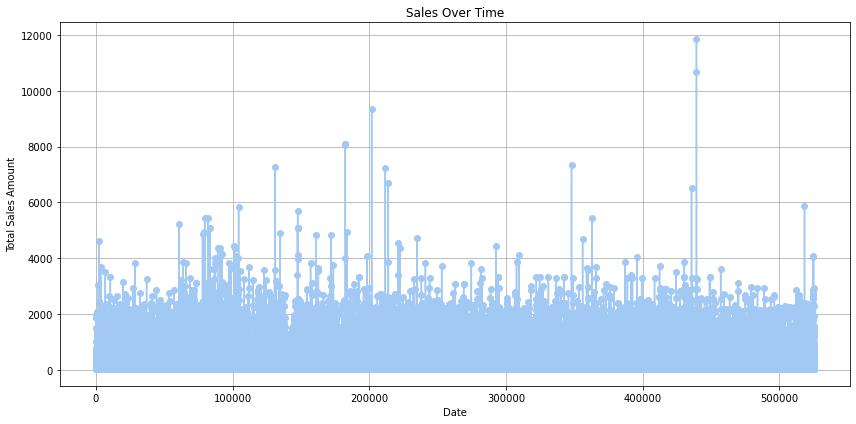

In [118]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'sales_over_time' with date and sales data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.iloc[: , 6], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## price analysis 

In [124]:
import pandas as pd

# Assuming you have a DataFrame 'data' and you want to convert the column at index 8 to float
data.iloc[:, 8] = data.iloc[:, 8].str.replace(',', '', regex=True)  # Remove commas if present
data.iloc[:, 8] = pd.to_numeric(data.iloc[:, 8], errors='coerce')  # Convert to float, 'coerce' handles non-numeric values



In [125]:
data.iloc[:, 8] = pd.to_numeric(data.iloc[:, 8], errors='coerce')  

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 8, dtype: float64
0      NaN
1    244.0
2     28.0
3     15.0
4    385.0
Name: 6, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 8, dtype: float64
0      NaN
1    244.0
2     28.0
3     15.0
4    385.0
Name: 6, dtype: float64


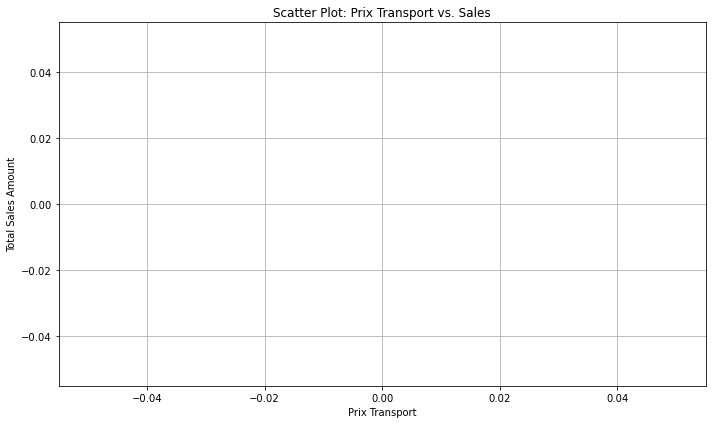

In [127]:
# Check the converted data
print(data.iloc[:, 8].head())  # Verify that 'Prix transport' is now numeric
print(data.iloc[:, 6].head())  # Verify that 'Sales' is numeric

prix_transport = data.iloc[:, 8]  # Prix Transport column after conversion
sales = data.iloc[:, 6]  # Sales column (assuming it's at index 6)

# Check if the data is not empty
print(prix_transport.head())
print(sales.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prix_transport, sales, color='skyblue', alpha=0.5)
plt.xlabel('Prix Transport')
plt.ylabel('Total Sales Amount')
plt.title('Scatter Plot: Prix Transport vs. Sales')
plt.grid(True)
plt.tight_layout()
plt.show()






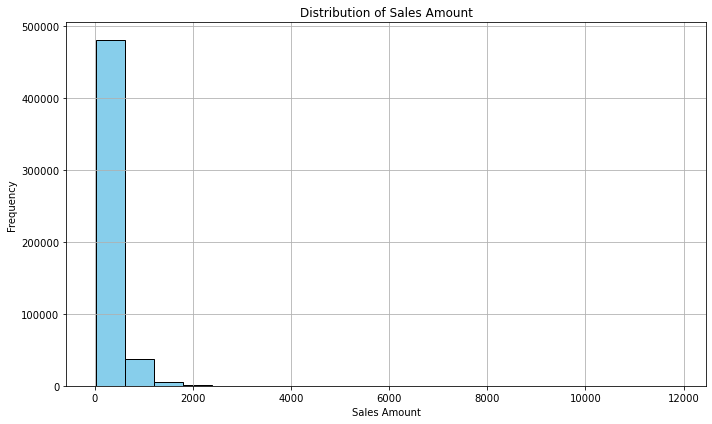

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(data.iloc[: , 6], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()
